# Testing crowding in star clusters with ellc third light option

### In ellc.lc.__doc__

```
light_3 : float, optional
      Third light contribution relative to total flux from both stars at 
      time t_zero excluding eclipse effects.
```

* Calculate the surface density and number of stars per resolution element
* Created a single star class (that runs through SED, and gives all the magnitudes and fluxes in each filter)
* Draw and evolve some number of singles stars with COSMIC 
* Draw randomly from this set up to the number of stars per resolution element and sum the fluxes
* Use this to define the third light

### To do
* Add the surface density (and crowding fraction?) to the header of the output file
* Add the third light fraction to each line of the output file
* Decide if I should use the fraction of stars per resolution element to define light_3, or should I draw a random number to see if at least 1 star is actually in the same resolution element.  (I think I should use the fraction, but I shold consult with Adam)

In [4]:
import ellc

import numpy as np
import pandas as pd
from astropy import units, constants
from astropy.coordinates import SkyCoord

import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline

import sys
sys.path.insert(0, '/Users/ageller/WORK/LSST/onGitHub/EBLSST/code')
from LSSTEBClusterWorker import LSSTEBClusterWorker
from OpSim import OpSim
from getClusterBinaries import getClusterBinaries
from SED import SED

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### First, let's test the light_3 option in ellc

0.0 0.33712071350562217
1.0 0.6685603567528111
2.0 0.7790402378352074
3.0 0.8342801783764056
4.0 0.8674241427011244
5.0 0.8895201189176037
6.0 0.9053029590722317
7.0 0.9171400891882027
8.0 0.926346745945069
9.0 0.9337120713505621
10.0 0.9397382466823292
11.0 0.9447600594588019
12.0 0.9490092856542787
13.0 0.952651479536116
14.0 0.9558080475670415
15.0 0.9585700445941014
16.0 0.9610071007944484
17.0 0.9631733729725346
18.0 0.965111616500296
19.0 0.9668560356752811
20.0 0.9684343196907439
21.0 0.9698691233411647
22.0 0.9711791614567662
23.0 0.972380029729401
24.0 0.9734848285402249
25.0 0.9745046428271393
26.0 0.9754489153150231
27.0 0.9763257397680579
28.0 0.9771420935691594
29.0 0.9779040237835207
30.0 0.9786167972098588
31.0 0.9792850222970507
32.0 0.9799127488941097
33.0 0.9805035503972241
34.0 0.9810605918144464
35.0 0.9815866864862673
36.0 0.98208434360826
37.0 0.982555808250148
38.0 0.9830030952180929
39.0 0.9834280178376406
40.0 0.9838322125245273
41.0 0.984217159845372
42.0 0.98

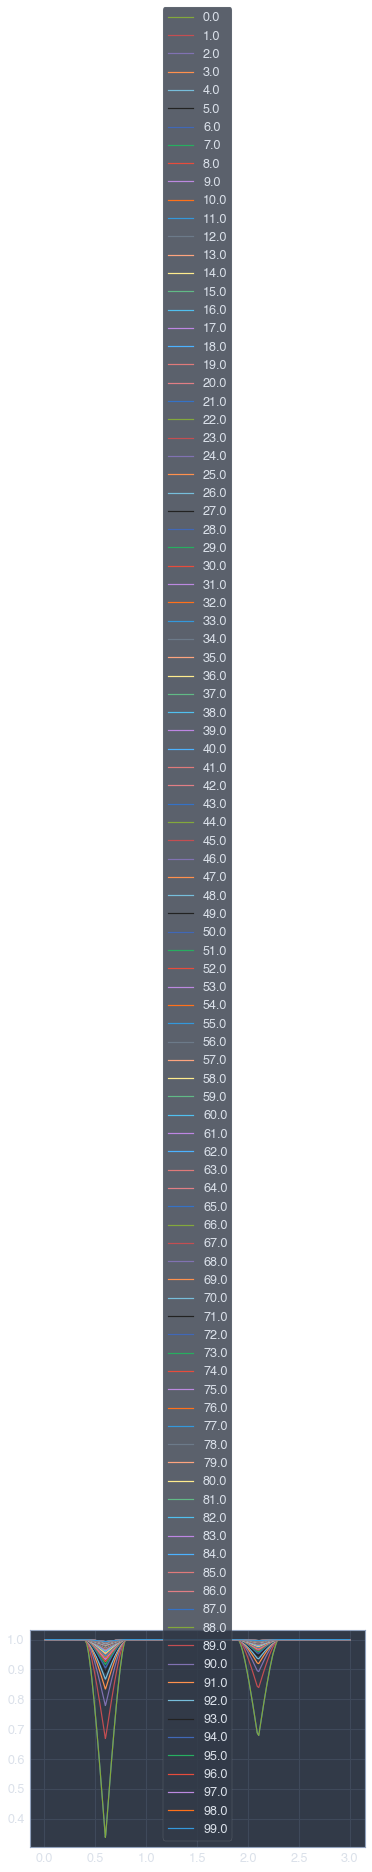

In [6]:
period = 3 #days
r1 = 0.2 #solar radii
r2 = 0.2 #solar radii
sbratio = 0.5
incl = 90. #degrees
t_zero = 0.2*period
t_obs = np.sort(np.random.random(500)*1.*period)

lc_clean = ellc.lc(t_obs, period=period, radius_1=r1, radius_2=r2, sbratio=sbratio, 
                   incl=incl, t_zero=t_zero)

f,ax = plt.subplots()
ax.plot(t_obs, lc_clean)

third = np.linspace(0,99, 100)
for t in third:
    lc_third = ellc.lc(t_obs, period=period, radius_1=r1, radius_2=r2, sbratio=sbratio, 
                       incl=incl, t_zero=t_zero, light_3 = t)
    ax.plot(t_obs, lc_third, label=t)
    print(t, min(lc_third))
ax.legend()

### Now let's try converting a surface density to a number of stars in the LSST resolution element

pixel size : 0.2 arcsec (https://www.lsst.org/scientists/keynumbers)

median seeing: 0.7 arsec (https://en.wikipedia.org/wiki/Large_Synoptic_Survey_Telescope)

I will assume that one resolution element is (2.*0.7)^2 

*Should I simply use the stars per resolution element to define the light_3, or should I draw a random number and see if a star would actually fall in the same resolution element?  I think I will use the fraction.*

In [3]:
seeing = 0.7 #arcsec
resEl = (2.*seeing/60.)**2. #arcmin^2

In [4]:
#lets use M10 as an example to test
GCDF = pd.read_csv("/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/clusters/GCdataForEBLSST.csv").fillna(0.)
OCDF = pd.read_csv("/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/clusters/OCdataForEBLSST.csv").fillna(0.)
GCDF

,ID,RA[hr],Dec[deg],dist[pc],rhm[pc],mass[Msun],age[Myr],[Fe/H],sigma_v0_z[km/s],OpSimID,OpSimRA[deg],OpSimDec[deg]
0,NGC 104,00 24 05.67,-72 04 52.6,4500.0,4.149521,1.059327e+06,12343.750000,-0.720000,11.000000,114.0,5.606889,-73.293784
1,NGC 288,00 52 45.24,-26 34 57.4,8900.0,5.773259,9.057952e+04,9757.440476,-1.320000,2.900000,1524.0,14.033108,-25.294617
2,NGC 362,01 03 14.26,-70 50 55.6,8600.0,2.051344,4.256278e+05,9522.321429,-1.260000,6.400000,162.0,19.216740,-70.227766
3,Whiting 1,02 02 57,-03 15 10,30100.0,1.926262,1.741927e+03,11081.821987,-0.700000,0.864470,2508.0,29.637645,-2.836499
4,NGC 1261,03 12 16.21,-55 12 58.4,16300.0,3.224205,2.382484e+05,9287.202381,-1.270000,7.814409,492.0,50.475658,-54.543202
5,Pal 1,03 33 20.04,+79 34 51.8,11100.0,1.485275,1.840899e+03,6465.773810,-0.650000,1.012055,5250.0,55.141667,80.199608
6,AM 1,03 55 02.3,-49 36 55,123300.0,14.705272,1.409386e+04,11081.821987,-1.700000,0.889961,621.0,57.903841,-50.212216
7,Eridanus,04 24 44.5,-21 11 13,90100.0,12.056153,2.037183e+04,11081.821987,-1.430000,1.181689,1714.0,67.408736,-20.535329
8,Pal 2,04 46 05.91,+31 22 53.4,27200.0,3.956080,2.786314e+05,11081.821987,-1.420000,7.629128,4053.0,72.000010,31.829949
9,NGC 1851,05 14 06.76,-40 02 47.6,12100.0,1.795071,3.881772e+05,8816.964286,-1.180000,10.400000,949.0,79.406498,-39.869134


In [5]:
field = GCDF.loc[GCDF['ID'] == 'NGC 6254'] #M10 GC
#field = OCDF.loc[OCDF['ID'] ==  'NGC_2682'] #M67 OC

In [6]:
def getStarsPerResEl(rh, mass, dist, d2D=None):
    #from a Plummer model
    #pick a radius randomly from the Plummer model
    #From Kroupa's initial conditions (eq. 8.102)
    rPlummer = rh*(2**(2./3.) - 1.)**0.5

    if (d2D == None):
        print('drawing a random projected distance from the center')
        X1 = np.random.random()
        X2 = np.random.random()
        X3 = np.random.random()
        zeta = (X1**(-2/3.) - 1.)**(-0.5)
        r = zeta*rPlummer
        #this is a 3D r; we need to make this 2D
        z = 2.*r*X2 - r
        x = (r**2. - z**2.)**0.5*np.cos(X3*2.*np.pi)
        y = (r**2. - z**2.)**0.5*np.sin(X3*2.*np.pi)
        d2D = (x**2. + y**2.)**0.5
    
    #projected mass density
    massDensity = mass/(np.pi*rPlummer**2.)*(1. + d2D**2./rPlummer**2.)**-2. #Msun/pc**2.

    #take some mean stellar mass to convert to stars/pc**2
    meanMass = 0.5
    numberDensity = massDensity/meanMass

    #convert the denominator to arcmin^2
    angle = np.arctan2(1., dist)*180./np.pi*60. #arcmin/pc
    surfaceDensity = numberDensity/angle**2.

    #stars/resolution element
    starsPerResEl = surfaceDensity*resEl

    #print(f' r = {r} pc \n dist = {dist} kpc \n angle = {angle} arcmin \n MSigmapc = {massDensity} Msun/pc^2 \n NSigmapc = {numberDensity} stars/pc^2 \n NSigma = {surfaceDensity} stars/arcmin^2 \n N/res = {starsPerResEl} stars/resolution element')
    return starsPerResEl, d2D

rh = field['rhm[pc]'].values[0]
mass = field['mass[Msun]'].values[0]
dist = field['dist[pc]'].values[0]
starsPerResEl, d = getStarsPerResEl(rh, mass, dist, d2D=0)
print(f' d = {d} pc \n N/res = {starsPerResEl} stars/resolution element')

 d = 0 pc 
 N/res = 27.533388853176206 stars/resolution element


### Test the single evolution bits in getClusterBinaries

In [7]:
sampler = getClusterBinaries(field['age[Myr]'].values[0], 
                             field['[Fe/H]'].values[0], 
                             field['sigma_v0_z[km/s]'].values[0], 
                             100)
sampler.random_seed = 1111.
sampler.dist = dist/1000.
sampler.Nsing = 100
sampler.Initial_Single_Sample()

initial single input: 1111.0 10345.238095238095 -1.56 100


In [8]:
sampler.EvolveSingles()
sampler.SinglesEvolved

KeyError: 'ecsn'

## Single star class to get Fluxes

In [ ]:
from dust_extinction.parameter_averages import F04
import numpy as np

#for A_V
#import vespa.stars.extinction
from vespa_update import extinction

#class to get the SED values for singles
class SingleStar(object):
    def __init__(self, *args,**kwargs):
        
        self.SED = None
        self.m = None #*units.solMass
        self.R = None #*units.solRad
        self.L = None #*units.solLum
        self.M_H = 0. #metallicity
        self.AV = None
        self.RA = None
        self.Dec = None
        self.dist = None #*units.kpc
        
        #these will be calculated
        self.T = None #Kelvin
        self.logg = None 
        self.Fv = dict()
        self.Ared = dict()
        self.BC = dict()
        self.appMagMean = dict()

        #don't touch these
        self.filters = ['u_', 'g_', 'r_', 'i_', 'z_', 'y_']
        self.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
        self.RV = 3.1
        #from https://www.lsst.org/scientists/keynumbers
        #in nm
        self.wavelength = {
            'u_': (324. + 395.)/2.,
            'g_': (405. + 552.)/2.,
            'r_': (552. + 691.)/2.,
            'i_': (691. + 818.)/2.,
            'z_': (818. + 921.)/2.,
            'y_': (922. + 997. )/2.
        } 
        
    #also in EclipsingBinary
    def getTeff(self, L, R):
        #use stellar radius and stellar luminosity to get the star's effective temperature
        logTeff = 3.762 + 0.25*np.log10(L) - 0.5*np.log10(R) 
        return 10.**logTeff

    def getlogg(self,m, L, T):
        #use stellar mass, luminosity, and effective temperature to get log(gravity)
        return np.log10(m) + 4.*np.log10(T) - np.log10(L) - 10.6071
    
    def initialize(self):
        if (self.T == None): self.T = self.getTeff(self.L, self.r)
        if (self.logg == None): self.logg = self.getlogg(self.m, self.L, self.T)  
        #one option for getting the extinction
        if (self.AV == None):
            count = 0
            while (self.AV == None and count < 100):
                self.AV = extinction.get_AV_infinity(self.RA, self.Dec, frame='icrs')
                if (self.AV == None):
                    print("WARNING: No AV found", self.RA, self.Dec, self.AV, count)
                    
        #initialize the SED
        self.SED = SED()
        self.SED.filters = self.filters
        self.SED.filterFilesRoot = self.filterFilesRoot
        self.SED.T = self.T*units.K
        self.SED.R = self.R*units.solRad
        self.SED.L = self.L*units.solLum
        self.SED.logg = self.logg
        self.SED.M_H = self.M_H
        self.SED.EBV = self.AV/self.RV #could use this to account for reddening in SED
        self.SED.initialize()
        
        #one option for getting the extinction
        ext = F04(Rv=self.RV)
        Lconst = self.SED.getLconst()
        for f in self.filters:
            self.Ared[f] = ext(self.wavelength[f]*units.nm)*self.AV
            self.Fv[f] = self.SED.getFvAB(self.dist*units.kpc, f, Lconst = Lconst)
            self.appMagMean[f] = -2.5*np.log10(self.Fv[f]) + self.Ared[f] #AB magnitude 


### Use this class to get the combined mag for the third light

*Could add this into the getClusterBinaries class*

In [ ]:
#Sum up the flux from Nsingles random stars drawn from the evolved single population
#I will use the ceiling of starsPerResEl, then cut it back to the fractional value
def getThirdLight(starsPerResEl, sampler, AV):
    Nsingles = int(np.ceil(starsPerResEl))
    singlesFv = dict()
    filters = ['u_', 'g_', 'r_', 'i_', 'z_', 'y_']       
                    
    for i in range(Nsingles):
        #sample a random star
        star = sampler.SinglesEvolved.sample()
        s = SingleStar()
        s.M_H = field['[Fe/H]'].values[0]

        s.RA = coord.ra.to(units.degree).value
        s.Dec = coord.dec.to(units.degree).value
        s.dist = field['dist[pc]'].values[0]/1000.
        s.AV = AV
        
        s.m = star['mass_1'].values[0]
        s.R = 10.**star['rad_1'].values[0]
        s.L = 10.**star['lumin_1'].values[0]
        s.T = 10.**star['teff_1'].values[0]
        s.initialize()
        #print(s.m, s.Fv, s.appMagMean)
        
        for f in filters:
            if (i == 0):
                singlesFv[f] = s.Fv[f]
            else:
                singlesFv[f] += s.Fv[f]
                
    #check the combined magnitude
    appMagMean = dict()
    frac = starsPerResEl/Nsingles
    #print(frac)
    for f in filters:
        #trim off the extra flux to match the starsPerResEl? <-- THIS NEEDS IMPROVEMENT
        singlesFv[f] *= frac
        appMagMean[f] = -2.5*np.log10(singlesFv[f]) + s.Ared[f] #AB magnitude 
    
    return singlesFv, appMagMean

In [ ]:
coord = SkyCoord(field['RA[hr]'].values[0], field['RA[hr]'].values[0], 
            unit=[units.hourangle, units.degree])
AV = extinction.get_AV_infinity(coord.ra, coord.dec, frame='icrs')
        
singlesFv, appMagMean = getThirdLight(starsPerResEl, sampler, AV)

print('Nsingles = ', int(np.ceil(starsPerResEl)))
print('total flux = ',singlesFv )
print('combined mag = ',appMagMean )

## Running as if I'm using the MPI driver code

In [ ]:
OpS = OpSim()
OpS.dbFile = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/db/baseline2018a.db'
OpS.getCursors()

In [ ]:
OpS.fieldID = field['OpSimID'].values
OpS.RA = field['OpSimRA[deg]'].values
OpS.Dec = field['OpSimDec[deg]'].values
OpS.obsDates = np.full_like(OpS.fieldID, dict(), dtype=dict)
OpS.NobsDates = np.full_like(OpS.fieldID, dict(), dtype=dict)
OpS.m_5 = np.full_like(OpS.fieldID, dict(), dtype=dict)
OpS.totalNobs = np.full_like(OpS.fieldID, 0)

In [ ]:
OpSimi = 0
worker = LSSTEBClusterWorker()
worker.filterFilesRoot = '/Users/ageller/WORK/LSST/onGitHub/EBLSST/input/filters/'
worker.clusterName = field['ID'].values
worker.clusterMass = field['mass[Msun]'].values
worker.clusterDistance = field['dist[pc]'].values/1000.
worker.clusterMetallicity = field['[Fe/H]'].values
worker.clusterAge = field['age[Myr[]]'].values
worker.clusterRhm = field['rhm[pc]'].values
worker.clusterVdisp = field['sigma_v0_z[km/s]'].values
    
worker.OpSim = OpS

worker.seed = 1111

worker.initialize(OpSimi)

In [ ]:
worker.n_bin = 100
clusterDat = worker.sampleCluster(OpSimi)

In [ ]:
i=7
line= clusterDat[i]
#change the inclination
line[12] = np.pi/2.
#change the period
line[2] = np.log10(3.47)

EB = worker.getEB(line, OpSimi=OpSimi)

rh = field['rhm[pc]'].values[0]
mass = field['mass[Msun]'].values[0]
dist = field['dist[pc]'].values[0]/1000.
d2D = np.linspace(0,10, 9)
singlesFvArr = []
for d in d2D:
    starsPerResEl, dd = getStarsPerResEl(rh, mass, dist, d2D = d)
    sFv, _ = getThirdLight(starsPerResEl, sampler)
    singlesFvArr.append(sFv)
    print(d, dd,starsPerResEl, sFv)

print(EB.period, EB.inclination, EB.R_1, EB.R_2, EB.sbratio, EB.q)

In [ ]:
cmap = matplotlib.cm.get_cmap('tab10')

fig,ax = plt.subplots(6,1, figsize=(10,30), sharex = True)
for i,f in enumerate(worker.filters):

    #default
    EB.light_3 = 0.
    EB.observe(f)
    phase = (EB.obsDates[f] % EB.period)
    sort = np.argsort(phase)
    ax[i].plot(phase[sort], EB.appMag[f][sort], color='green')
    ax[i].set_ylim(max(EB.appMagObs[f]), min(EB.appMagObs[f]))
    ax[i].set_ylabel(f)
    ax[i].set_xlim(min(phase), max(phase))
    
    #with crowding
    for j,s in enumerate(singlesFvArr):
        EB.light_3 = s[f]/(EB.Fv1[f] + EB.Fv2[f])
        EB.observe(f)
        ax[i].plot(phase[sort], EB.appMag[f][sort], color=cmap(float(j)/len(d2D)), label=d2D[j], linewidth=2)
        ax[i].plot(phase[sort], EB.appMagObs[f][sort], '.', alpha=0.3, color=cmap(float(j)/len(d2D)))
        print(i,j, d2D[j], f, EB.light_3)

plt.subplots_adjust(hspace=0)
ax[0].legend(bbox_to_anchor=(1.2,1))